In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.stats.mstats import winsorize

## Carga de datos

Se cargan las columnas con formatos adecuados según el tipo de datos.  
Se usa como índice building_id para train_values y train_labels  

In [3]:
# Train values
# Levantar los datos de cada edificio/casa
df = pd.read_csv('datos/train_values.csv',nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
train_values = pd.read_csv('datos/train_values.csv',dtype=datatypes)
train_values = train_values.set_index("building_id")
columnas = train_values.columns.to_list()

In [4]:
#Train labels
train_labels = pd.read_csv('datos/train_labels.csv',index_col='building_id')

## Predicciones correctas e incorrectas

In [1]:
## Aca falta cargar y_pred

In [158]:
train_predictions = pd.DataFrame(data=y_pred,
                             columns=['prediction_damage_grade'],
                             index=train_labels.index)

In [159]:
results_df = train_labels.join(train_predictions)
results_df = results_df.rename(columns={'damage_grade':'real_damage_grade'})
results_df

,real_damage_grade,prediction_damage_grade
building_id,,
802906,3,3
28830,2,2
94947,3,3
590882,2,2
201944,3,2
...,...,...
688636,2,2
669485,3,3
602512,3,3


In [179]:
indices_pred_correcta = results_df.loc[results_df['real_damage_grade']==results_df['prediction_damage_grade']].index

In [180]:
edificios_correcto = train_values.loc[indices_pred_correcta]
edificios_correcto

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
28830,8,900,2812,2,10,8,7,o,r,n,...,False,False,False,False,False,False,False,False,False,False
94947,21,363,8973,2,10,5,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
590882,22,418,10694,2,10,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
333020,8,558,6089,2,10,9,5,t,r,n,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,...,False,False,False,False,False,False,False,False,False,False
669485,17,715,2060,2,0,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
602512,17,51,8163,3,55,6,7,t,r,q,...,False,False,False,False,False,False,False,False,False,False


In [181]:
indices_pred_incorrecta = results_df.loc[results_df['real_damage_grade']!=results_df['prediction_damage_grade']].index

In [182]:
edificios_incorrecto = train_values.loc[indices_pred_incorrecta]
edificios_incorrecto

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
201944,11,131,1488,3,30,8,9,t,r,n,...,False,False,False,False,False,False,False,False,False,False
605134,18,1295,6994,2,25,7,6,t,r,n,...,False,False,False,False,False,False,False,False,False,False
980230,27,216,12323,3,10,7,7,t,r,n,...,False,False,False,False,False,False,False,False,False,False
466558,3,1229,7251,2,10,7,6,t,r,n,...,False,False,False,False,False,False,False,False,False,False
987864,10,1097,399,2,20,7,4,t,r,q,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333974,7,1306,2696,2,10,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
79341,17,930,2687,3,30,8,6,t,r,n,...,False,False,False,False,False,False,False,False,False,False
365117,10,1227,1225,2,5,12,6,t,r,n,...,False,False,False,False,False,False,False,False,False,False


In [267]:
indices_gran_dif = results_df.loc[(results_df['real_damage_grade']==3) & (results_df['prediction_damage_grade']==3)].index
edificios_gran_dif = train_values.loc[indices_gran_dif]

In [268]:
edificios_gran_dif

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
94947,21,363,8973,2,10,5,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False
728451,9,475,12066,2,25,3,4,n,r,n,...,False,False,False,False,False,False,False,False,False,False
7962,17,1119,12188,2,20,9,6,t,r,q,...,False,False,False,False,False,False,False,False,False,False
287845,17,817,6284,3,45,7,7,t,r,q,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317439,30,106,3085,2,20,8,5,t,r,n,...,True,False,False,False,False,False,False,False,False,False
603159,8,696,4513,3,20,7,9,t,r,n,...,True,False,False,False,False,False,False,False,False,False
669485,17,715,2060,2,0,6,5,t,r,n,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

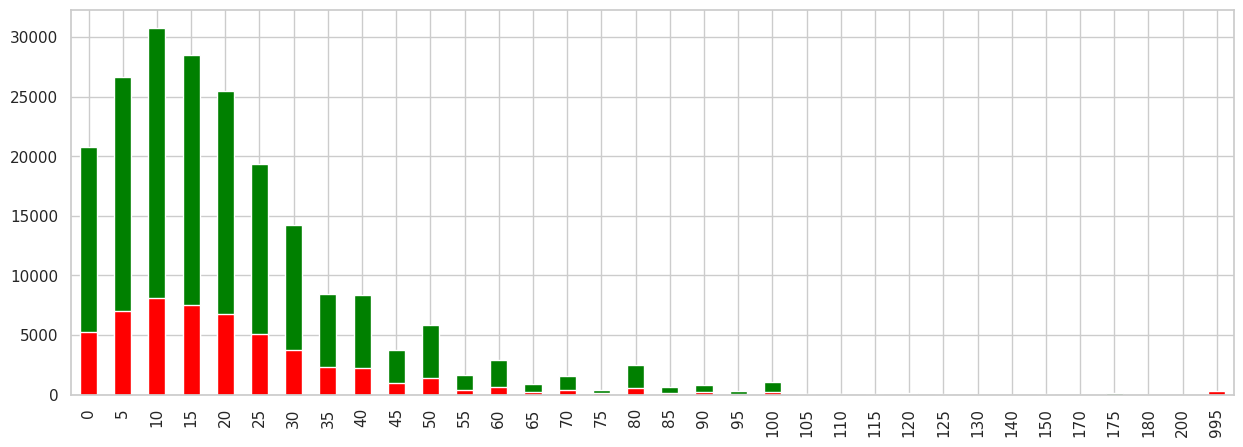

In [186]:
edificios_correcto['age'].value_counts().sort_index().plot(kind='bar',color='green',figsize=(15,5))
edificios_incorrecto['age'].value_counts().sort_index().plot(kind='bar',color='red',figsize=(15,5))

<AxesSubplot:>

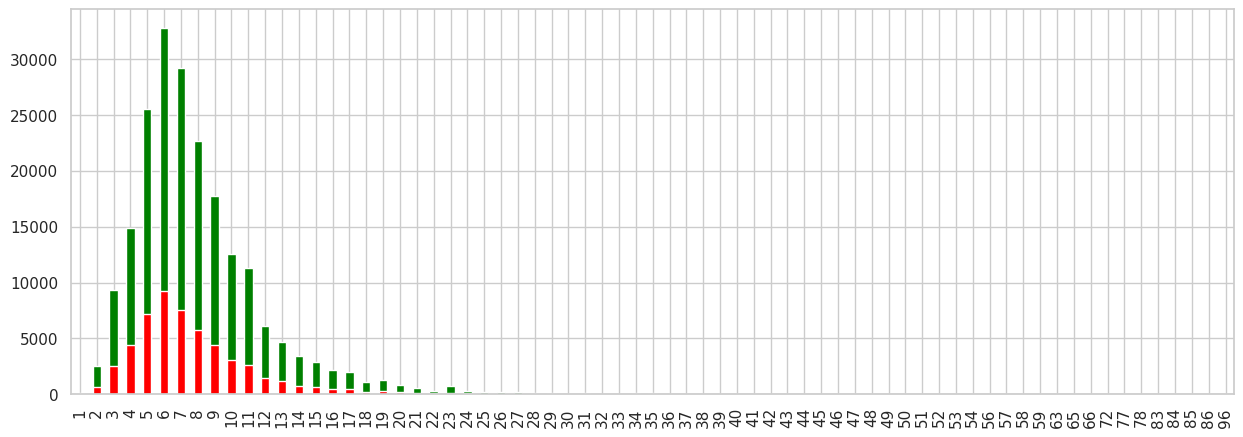

In [188]:
edificios_correcto['area_percentage'].value_counts().sort_index().plot(kind='bar',color='green',figsize=(15,5))
edificios_incorrecto['area_percentage'].value_counts().sort_index().plot(kind='bar',color='red',figsize=(15,5))

<AxesSubplot:>

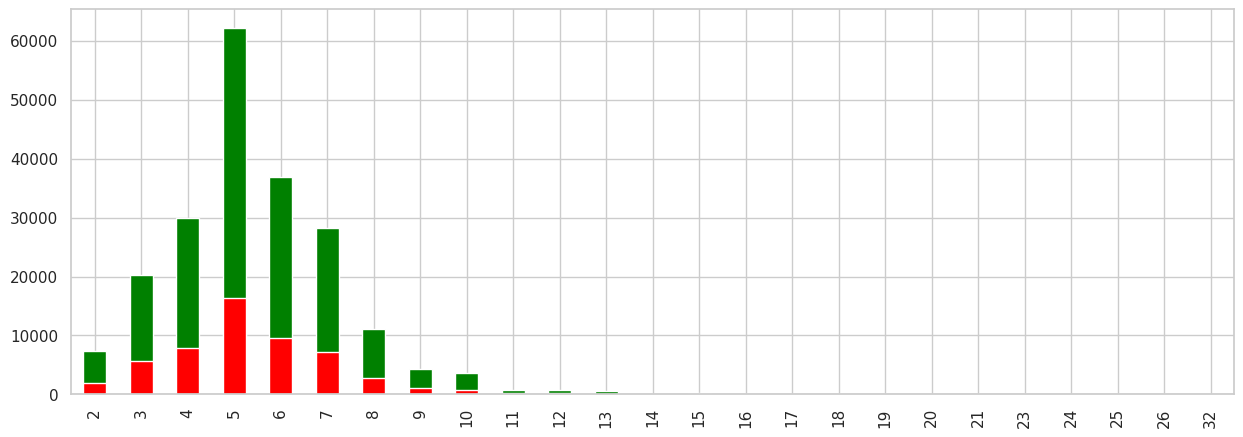

In [189]:
edificios_correcto['height_percentage'].value_counts().sort_index().plot(kind='bar',color='green',figsize=(15,5))
edificios_incorrecto['height_percentage'].value_counts().sort_index().plot(kind='bar',color='red',figsize=(15,5))

In [241]:
edificios_geo_daños = train_values.join(results_df)
edificios_geo_daños['right_prediction'] = edificios_geo_daños['real_damage_grade']==edificios_geo_daños['prediction_damage_grade']
edificios_geo_daños['count'] = 1
edificios_geo_daños = edificios_geo_daños[['geo_level_1_id','right_prediction','count']]
edificios_geo_daños = edificios_geo_daños.groupby(['geo_level_1_id','right_prediction']).count().unstack()
edificios_geo_daños.head(3)

count      
right_prediction False True 
geo_level_1_id              
0                  727  3284
1                  458  2243
2                  141   790

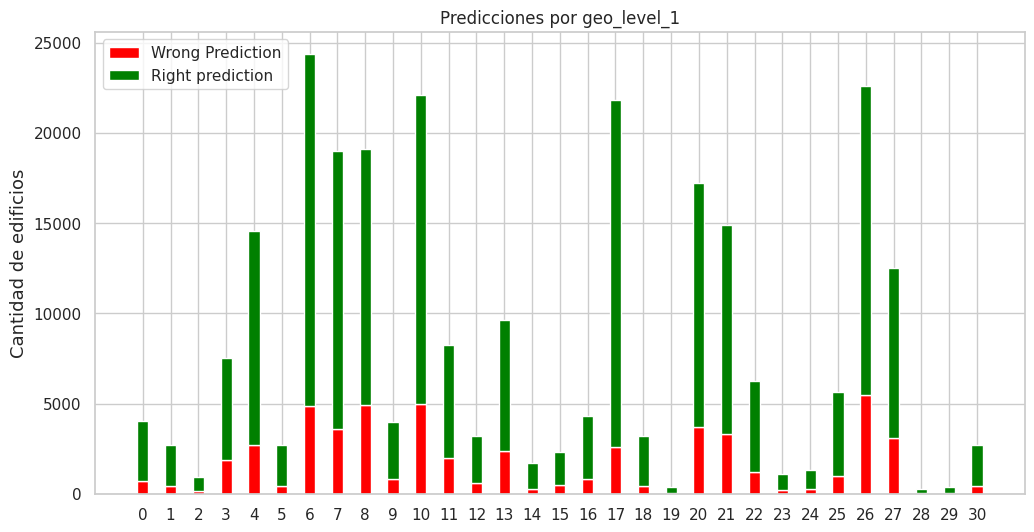

In [243]:
labels = edificios_geo_daños.index.to_list()
low_affected = np.array(edificios_geo_daños[('count',0)].to_list())
medium_affected = np.array(edificios_geo_daños[('count',1)].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Wrong Prediction',color='red')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Right prediction', color='green')

ax.set_title('Predicciones por geo_level_1')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()

In [239]:
edificios_geo_daños_perc = edificios_geo_daños.div(edificios_geo_daños.sum(axis=1), axis=0).sort_values(by=('count',0),ascending=False)
edificios_geo_daños_perc.head(20)

count       
right_prediction  False  True 
geo_level_3_id                
5642             1.0000    NaN
3142             1.0000    NaN
10876            1.0000    NaN
737              1.0000    NaN
12243            1.0000    NaN
9881             1.0000    NaN
6099             1.0000    NaN
7042             1.0000    NaN
6314             1.0000    NaN
3175             1.0000    NaN
2884             1.0000    NaN
1948             1.0000    NaN
6535             1.0000    NaN
6661             1.0000    NaN
11616            1.0000    NaN
6806             1.0000    NaN
2172             0.8750 0.1250
2952             0.7857 0.2143
5198             0.7500 0.2500
7332             0.7500 0.2500

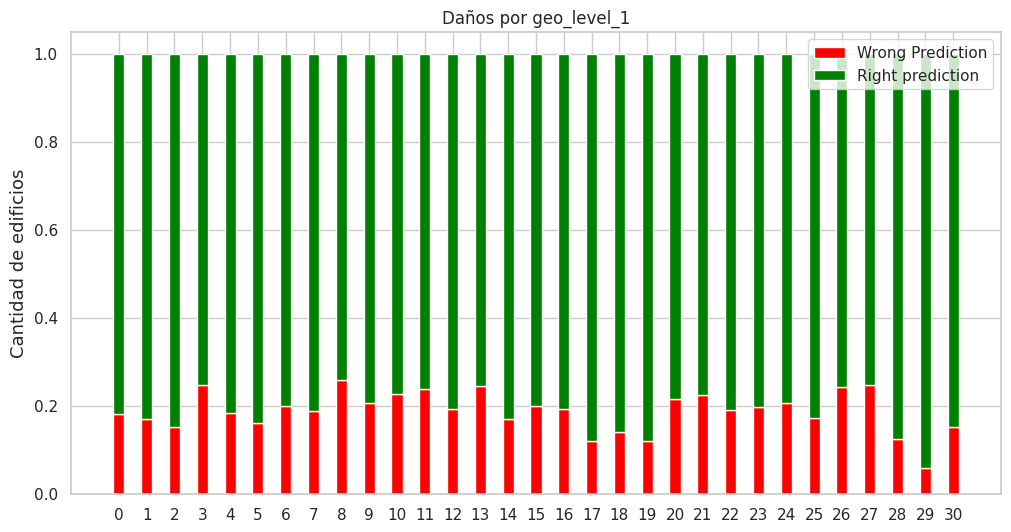

In [228]:
labels = edificios_geo_daños_perc.index.to_list()
low_affected = np.array(edificios_geo_daños_perc[('count',0)].to_list())
medium_affected = np.array(edificios_geo_daños_perc[('count',1)].to_list())

width = 0.4
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(labels, low_affected, width, label='Wrong Prediction',color='red')
ax.bar(labels, medium_affected, width, bottom=low_affected,label='Right prediction', color='green')

ax.set_title('Daños por geo_level_1')
ax.legend()
plt.xticks(labels)
ax.set_ylabel('Cantidad de edificios', fontsize = 13)
plt.show()